### House predictions with linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from skimpy import skim
import utils

In [2]:
# Load the data using pandas
data = pd.read_csv('Hyderabad.csv')
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [3]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2518   │ │ int64       │ 39    │                                                          │
│ │ Number of columns │ 40     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Price        │  0 │    0 │ 9818000 │ 8777000 │ 2000000 │ 4760000 │ 7754000 │ 10900000 │ 165000000 │   █    │  │
│ │ Area         │  0 │    0 │    1645 │   746.3 │     500 │    1160 │    1500 │     1829 │      9400 │   █▁   │  │
│ │ No. of       │  0 │    0 │   2.624 │  0.6873 │       1 │       2 │       3 │        3 │         8 │  ▇█▁   │  │
│ │ Bedrooms     │    │      │         │         │         │         │         │          │           │        │  │
│ │ Resale       │  0 │    0 │  0.2276 │  0.4193 │       0 │       0 │       0 │        0 │         1 │ █    ▂ │  │
│ │ MaintenanceS │  0 │    0 │  0.4126 │   1.626 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ taff         │    │      │         │         │         │         │         │          │           │        │  │
│ │ Gymnasium    │  0 │    0 │  0.7399 │   1.611 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ SwimmingPool │  0 │    0 │  0.7097 │   1.615 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ LandscapedGa │  0 │    0 │  0.6191 │   1.624 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ rdens        │    │      │         │         │         │         │         │          │           │        │  │
│ │ JoggingTrack │  0 │    0 │    0.56 │   1.628 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ RainWaterHar │  0 │    0 │  0.6064 │   1.625 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ vesting      │    │      │         │         │         │         │         │          │           │        │  │
│ │ IndoorGames  │  0 │    0 │  0.5806 │   1.627 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ ShoppingMall │  0 │    0 │  0.3662 │   1.623 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ Intercom     │  0 │    0 │  0.6791 │   1.619 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ SportsFacili │  0 │    0 │  0.5536 │   1.628 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ ty           │    │      │         │         │         │         │         │          │           │        │  │
│ │ ATM          │  0 │    0 │  0.4218 │   1.627 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ ClubHouse    │  0 │    0 │  0.7117 │   1.615 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ School       │  0 │    0 │  0.3407 │   1.621 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ 24X7Security │  0 │    0 │  0.7065 │   1.616 │      

In [4]:
data["Location"] = data["Location"].astype('category')
data["Location"] = data["Location"].cat.codes
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,162,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,85,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,132,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,9,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,118,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,150,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,132,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,124,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,85,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


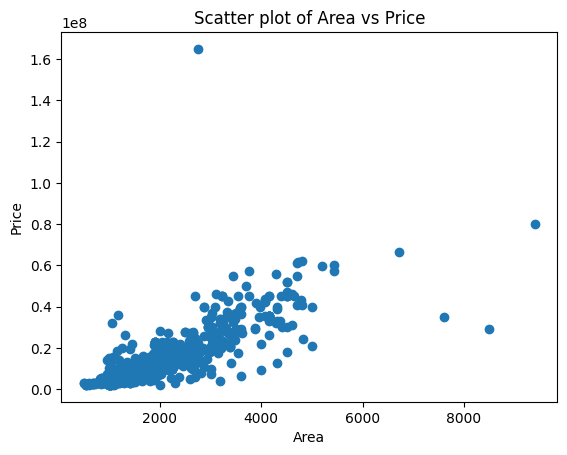

In [5]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter plot of Area vs Price')
plt.show()

In [6]:
# Scatter plot using Plotly
fig = px.scatter(data, x='Area', y='Price', title='Scatter plot of Area vs Price')
fig.update_layout(xaxis_title='Area', yaxis_title='Price')
fig.show()

In [7]:
# Prepare the data for scikit-learn
X = data[['Area']].values  # Feature(s)
y = data['Price'].values   # Target

In [8]:
# Create and train the linear regression model
simple_model = LinearRegression()
simple_model.fit(X, y)

LinearRegression()

In [9]:
# Get the coefficients
m = simple_model.coef_[0]  # Slope
b = simple_model.intercept_  # Intercept
print("slope:", m)
print("y-intercept:", b)

slope: 9753.94060818404
y-intercept: -6222669.083283702


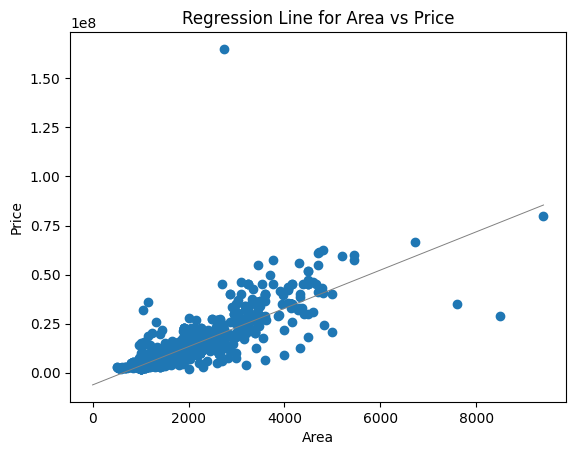

In [10]:
# Plot the regression line
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line for Area vs Price')
plt.show()

In [11]:
# Plot the regression line using Plotly
fig = px.scatter(data, x='Area', y='Price', title='Regression Line for Area vs Price')
line_x = np.linspace(0, max(data['Area']), 100)
line_y = m * line_x + b
fig.add_trace(go.Scatter(x=line_x, y=line_y, mode='lines', name='Regression Line'))
fig.update_layout(xaxis_title='Area', yaxis_title='Price')
fig.show()

### Building a model that uses 3 features

In [12]:
trained_features = ['Area', 'No. of Bedrooms', 'Location']
X_all = data[trained_features]
X_all

,Area,No. of Bedrooms,Location
0,1340,2,162
1,3498,4,85
2,1318,2,132
3,1295,3,9
4,1145,2,118
...,...,...,...
2513,1460,2,150
2514,1314,2,132
2515,2625,3,124
2516,2050,3,85


In [13]:
y_all = data['Price']

In [14]:
model = LinearRegression()
model.fit(X_all, y_all)

LinearRegression()

In [15]:
# Predict with fewer features (e.g., only 'Area' and 'No. of Bedrooms')
new_data = pd.DataFrame({'Area': [1200], 'No. of Bedrooms': [3], 'Location': [158]})

In [16]:
new_data

,Area,No. of Bedrooms,Location
0,1200,3,158


In [17]:
# Make predictions
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price)

Predicted Price: [4167481.59078972]


### Building a model that uses all the features

In [18]:
# Prepare the data for multiple linear regression
X_all = data.drop(columns=['Price']).values  # All features except the target
y_all = data['Price'].values                 # Target

In [19]:
X_all

array([[1340,  162,    2, ...,    0,    0,    0],
       [3498,   85,    4, ...,    0,    0,    0],
       [1318,  132,    2, ...,    0,    0,    0],
       ...,
       [2625,  124,    3, ...,    9,    9,    9],
       [2050,   85,    3, ...,    9,    9,    9],
       [1805,  158,    3, ...,    9,    9,    9]], shape=(2518, 39))

In [20]:
# Create and train the model
model = LinearRegression()
model.fit(X_all, y_all)

LinearRegression()

In [21]:
# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [   10473.70662675    -8278.77364742 -1585345.83155997  1474315.24496086
 -1225961.21386831 -1051608.87039685   662616.29014316   938868.93050579
  -314539.59912328  -563399.35383919  1073868.68345432   383870.30913708
    15371.73314443  -613044.75142086   277952.03783101   538121.45414087
 -1240172.1792701   -869035.98931714   515031.73568163   598805.02744957
  -123882.03904958  1043643.52830737   317644.58040247   400935.44959721
   -27466.1673474    664878.32557277  1165810.89686687   422248.61394574
   291069.74426282  -277168.28864624   534811.4173037    -23075.344564
 -1696127.5156708  -2180510.49039474  1332489.08006174   280085.92686779
 -1009056.56756322  -560498.15620853   230948.00194735]
Intercept: -3059235.4152794126


In [22]:
# Evaluate the model
predictions = model.predict(X_all)
mse = mean_squared_error(y_all, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 22264066865737.855
